In [120]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [121]:
df = pd.read_csv('fake_reg.csv')
df

,price,feature1,feature2
0,461.527929,999.787558,999.766096
1,548.130011,998.861615,1001.042403
2,410.297162,1000.070267,998.844015
3,540.382220,999.952251,1000.440940
4,546.024553,1000.446011,1000.338531
...,...,...,...
995,476.526078,1000.018988,999.672732
996,457.313186,998.855379,1000.020026
997,456.720992,1001.451646,998.847606
998,403.315576,1000.771023,998.562851


In [122]:
df.head()

,price,feature1,feature2
0,461.527929,999.787558,999.766096
1,548.130011,998.861615,1001.042403
2,410.297162,1000.070267,998.844015
3,540.382220,999.952251,1000.440940
4,546.024553,1000.446011,1000.338531


In [123]:
from sklearn.model_selection import train_test_split

In [124]:
X=df[['feature1','feature2']].values

In [125]:
Y=df['price'].values

In [126]:
X_train, X_test, Y_train,Y_test = train_test_split(X,Y,test_size=0.3,random_state=42)

In [127]:
X_train.shape

(700, 2)

In [128]:
Y_train.shape

(700,)

In [129]:
X_test.shape

(300, 2)

In [130]:
Y_test.shape

(300,)

In [131]:
from sklearn.preprocessing import MinMaxScaler

In [132]:
scaler = MinMaxScaler()

In [133]:
scaler.fit(X_train)

MinMaxScaler()

In [134]:
X_train= scaler.transform(X_train)

In [135]:
X_test = scaler.transform(X_test)

In [136]:
X_train.min()

0.0

In [137]:
X_train.max()

1.0

In [138]:
Y_train.min()

223.34679276337343

In [139]:
Y_train.max()

774.4078544514234

In [140]:
from tensorflow.keras.models import Sequential

In [141]:
from tensorflow.keras.layers import Dense

In [142]:
model = Sequential()

In [143]:
model.add(Dense(4,activation='relu'))
model.add(Dense(4,activation='relu'))
model.add(Dense(4,activation='relu'))
model.add(Dense(1))

In [144]:
model.compile(optimizer='rmsprop',loss='mse')

In [145]:
model.fit(x=X_train,y=Y_train, epochs=250)

Epoch 1/250
22/22 ━━━━━━━━━━━━━━━━━━━━ 3s 4ms/step - loss: 263359.0000
Epoch 2/250
22/22 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 256458.5156  
Epoch 3/250
22/22 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 258295.1875 
Epoch 4/250
22/22 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 254008.7500
Epoch 5/250
22/22 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 252645.6094 
Epoch 6/250
22/22 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 257857.0156 
Epoch 7/250
22/22 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 254586.5625
Epoch 8/250
22/22 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 256203.9531 
Epoch 9/250
22/22 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 252940.0000 
Epoch 10/250
22/22 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 255797.7500
Epoch 11/250
22/22 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 255616.0781
Epoch 12/250
22/22 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 250656.9844
Epoch 13/250
22/22 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 251860.0938 
Epoch 14/250
22/22 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 25246

In [146]:
loss_df = pd.DataFrame(model.history.history)

<Axes: >

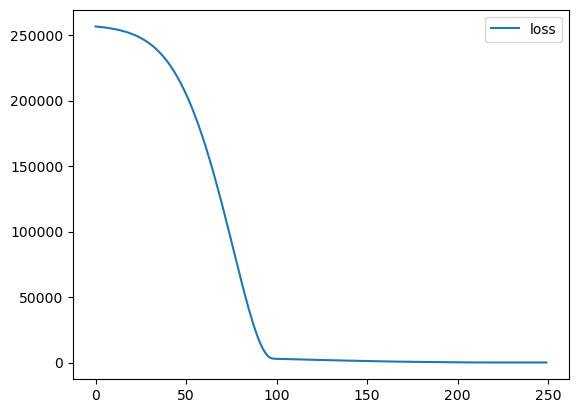

In [147]:
loss_df.plot()

In [149]:
model.evaluate(X_test,Y_test,verbose=0)

25.09181022644043

In [150]:
model.evaluate(X_train,Y_train,verbose=0)

24.200193405151367

In [151]:
text_prediction=model.predict(X_test)

10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step


In [153]:
prediction=pd.Series(text_prediction.reshape(300,))

In [154]:
pred_df = pd.DataFrame(Y_test,columns=['Test True Y'])

In [156]:
pred_df = pd.concat([pred_df,prediction],axis=1)

In [157]:
pred_df.columns = ['Test True Y','Model Prediction']
pred_df

,Test True Y,Model Prediction
0,402.296319,404.999084
1,624.156198,623.108704
2,582.455066,591.697815
3,578.588606,571.881287
4,371.224104,366.452209
...,...,...
295,525.704657,528.720093
296,502.909473,515.800354
297,612.727910,609.218201
298,417.569725,416.609192


<Axes: xlabel='Test True Y', ylabel='Model Prediction'>

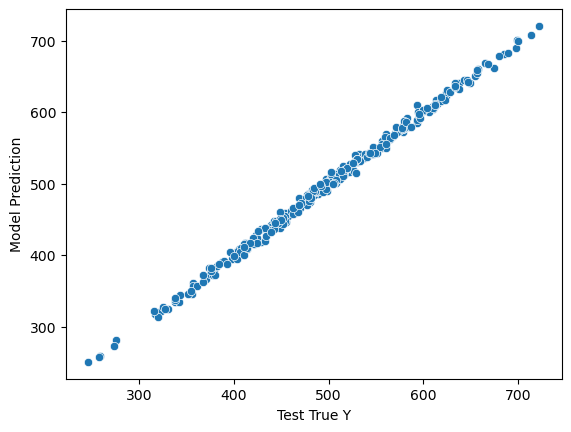

In [163]:
sns.scatterplot(x ='Test True Y',y ='Model Prediction',data=pred_df)

In [164]:
from sklearn.metrics import mean_squared_error, mean_absolute_error

In [165]:
mean_squared_error(pred_df['Test True Y'],pred_df['Model Prediction'])

25.091814367407615

In [169]:
mean_absolute_error(pred_df['Test True Y'],pred_df['Model Prediction'])

4.009493826293051